### import libraries

In [1]:
import json
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns




In [6]:
# get the lagos,nigeria wheather data from the API
API_Key=#""
city="lagos,NG"
url=f"https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_Key}"
response=requests.get(url)

In [9]:
data=response.json()
json_str=json.dumps(data,indent=4)
print(json_str)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1761037200,
            "main": {
                "temp": 303.77,
                "feels_like": 308.41,
                "temp_min": 303.77,
                "temp_max": 303.77,
                "pressure": 1013,
                "sea_level": 1013,
                "grnd_level": 1013,
                "humidity": 65,
                "temp_kf": 0
            },
            "weather": [
                {
                    "id": 803,
                    "main": "Clouds",
                    "description": "broken clouds",
                    "icon": "04d"
                }
            ],
            "clouds": {
                "all": 61
            },
            "wind": {
                "speed": 0.49,
                "deg": 234,
                "gust": 0.6
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "d"
            },
          

In [10]:
# Create a function to convert temperature from Kelvin to Celsius
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

In [11]:
if response.status_code == 200:
    data = response.json()
    weather_data = []
    for hour in data['list']:
        date_time = datetime.utcfromtimestamp(hour['dt']).strftime('%Y-%m-%d %H:%M:%S')
        temp = kelvin_to_celsius(hour['main']['temp'])
        feels_like = kelvin_to_celsius(hour['main']['feels_like'])
        pressure = hour['main']['pressure']
        humidity = hour['main']['humidity']
        weather_main = hour['weather'][0]['main']
        weather_description = hour['weather'][0]['description']
        wind_speed = hour['wind']['speed']
        wind_direction = hour['wind']['deg']
        cloudiness = hour['clouds']['all']
        rain_volume = hour.get('rain', {}).get('3h', 0)
        snow_volume = hour.get('snow', {}).get('3h', 0)
        
        # Append to weather_data list
        weather_data.append({
            'date_time': date_time,
            'temp': temp,
            'feels_like': feels_like,
            'pressure': pressure,
            'humidity': humidity,
            'weather_main': weather_main,
            'weather_description': weather_description,
            'wind_speed': wind_speed,
            'wind_direction': wind_direction,
            'cloudiness': cloudiness,
            'rain_volume': rain_volume,
            'snow_volume': snow_volume
        })
        
    df = pd.DataFrame(weather_data)
else:
    print(f"Failed to get data: {response.status_code}")

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_1844\2088286147.py:5: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date_time = datetime.utcfromtimestamp(hour['dt']).strftime('%Y-%m-%d %H:%M:%S')


,date_time,temp,feels_like,pressure,humidity,weather_main,weather_description,wind_speed,wind_direction,cloudiness,rain_volume,snow_volume
0,2025-10-21 09:00:00,30.62,35.26,1013,65,Clouds,broken clouds,0.49,234,61,0.00,0
1,2025-10-21 12:00:00,31.40,35.98,1012,61,Clouds,broken clouds,2.60,194,57,0.00,0
2,2025-10-21 15:00:00,30.69,35.17,1010,64,Rain,light rain,3.40,193,47,0.23,0
3,2025-10-21 18:00:00,26.17,26.17,1010,84,Rain,light rain,2.75,213,26,0.19,0
4,2025-10-21 21:00:00,25.70,26.60,1012,87,Clear,clear sky,2.18,228,4,0.00,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            40 non-null     object 
 1   temp                 40 non-null     float64
 2   feels_like           40 non-null     float64
 3   pressure             40 non-null     int64  
 4   humidity             40 non-null     int64  
 5   weather_main         40 non-null     object 
 6   weather_description  40 non-null     object 
 7   wind_speed           40 non-null     float64
 8   wind_direction       40 non-null     int64  
 9   cloudiness           40 non-null     int64  
 10  rain_volume          40 non-null     float64
 11  snow_volume          40 non-null     int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 3.9+ KB


In [24]:
# Convert DateTime from Object to DateTime
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract day and hour from DateTime
df['Day'] = df['date_time'].dt.date
df['Hour'] = df['date_time'].dt.hour

# Pivot the DataFrame
df_pivot = df.pivot(index='Day', columns='Hour', values='temp')

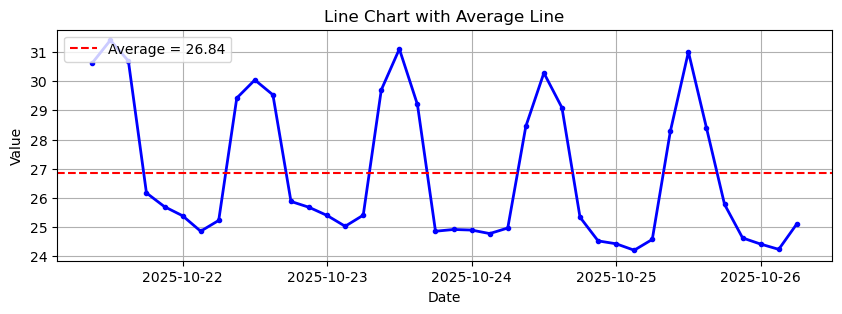

In [28]:
# Calculate average temperature
average_value = df['temp'].mean()

# Create the plot
plt.figure(figsize=(10,3))
plt.plot(df['date_time'], df['temp'], color='b', linestyle='-', linewidth=2, marker='o', markersize=3)
plt.axhline(y=average_value, color='r', linestyle='--', label=f'Average = {average_value:.2f}')  
plt.title('Line Chart with Average Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left') 
plt.grid(True)
plt.show()

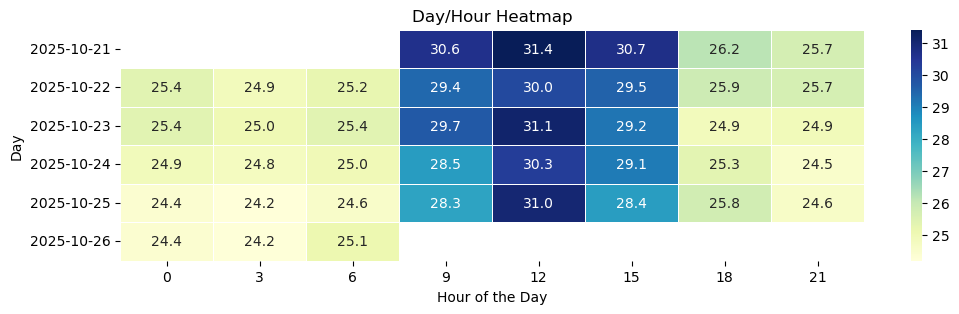

In [29]:
plt.figure(figsize=(12, 3))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Day/Hour Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Day')
plt.show()

In [36]:
# Database Credentials
db_username = #''
db_password =# ''
db_host = 'localhost'
db_port = 5432
db_name = 'postgres'

In [35]:
# Import Libraries
import pandas as pd  # For data transformation, manipulation, analysis, and cleaning.
import psycopg2  # For connecting to PostgreSQL databases and executing queries.
from sqlalchemy import create_engine  # To efficiently manage and reuse database connections


In [38]:
# Establish a connection using SQLAlchemy engine
engine = create_engine(f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')

# Create a table name
table_name = 'weather'

# Load the data into the table
df.to_sql(table_name, engine, if_exists='replace', index=False)

# Close the engine connection
engine.dispose()